Exploring Bezier and B-spline curves.

In [2]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

import sys; sys.path.append("../../")
import pykappa

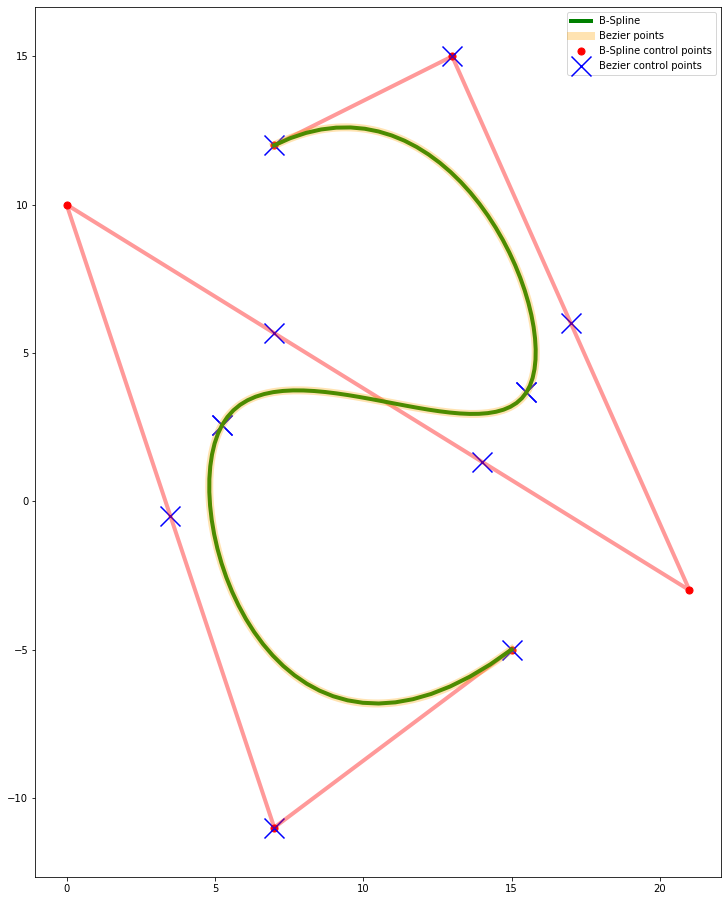

In [3]:
# Degree of the B-Spline (only 3 works here)
degree = 3

# Define B-Spline control points
ctrl_points = np.array([[314, 582], [50, 478], [126, 129], [613, 86], [400, 480], [653, 395]])
#ctrl_points = np.array([[1, 17], [4, 23], [14, 17], [29, 35], [43, 17], [18, 18], [14, 1], [9, 4], [8, 15]])
#ctrl_points = np.array([[10, 5], [7, 9], [14, 27], [15, 10], [30, 18], [27, 21]])
#ctrl_points = np.array([[19, 15], [0, 10], [7, 3], [25, 15], [35, 6], [16, 5], [11, 1], [7, 2]])
ctrl_points = np.array([[24, 12], [13, 20], [26, -1], [-2, -1], [0, 18], [12, 22]])
ctrl_points = np.array([[5, 20], [-5, 2], [22, 4], [35, 42], [67, 31], [71, 26], [67, -0], [46, -3], [44, 14], [36, 2]])
ctrl_points = np.array([[15, -5], [7, -11], [0, 10], [21, -3], [13, 15], [7, 12]])
count = len(ctrl_points)

# Compute knot vector
knot_vector = np.concatenate(([0] * degree, np.arange(0, count - degree + 1), [count - degree] * degree))

# Evaluate B-Spline
n_points = 100
u = np.linspace(0, (count - degree), n_points)
tck = (knot_vector, ctrl_points.T, degree)
bspline_points = np.array(si.splev(u, tck)).T

# Compute Bezier curves control points
bezier_ctrl_points = pykappa.spline.bspline_to_bezier(ctrl_points, degree, knot_vector=None)

# Evaluate Bezier curves
bezier_points = pykappa.spline.evaluate_bezier(bezier_ctrl_points, degree, n=100)

bezier_ctrl_points = np.reshape(bezier_ctrl_points, [-1, 2])

fig, ax = plt.subplots(figsize=(16, 16))

ax.scatter(ctrl_points[:, 0], ctrl_points[:, 1], s=50, color='red', label="B-Spline control points")
ax.plot(ctrl_points[:, 0], ctrl_points[:, 1], color='red', lw=4, alpha=0.4)
ax.plot(bspline_points[:, 0], bspline_points[:, 1], color='green', lw=4, label='B-Spline')

ax.scatter(bezier_ctrl_points[:, 0], bezier_ctrl_points[:, 1], marker='x', s=400, color='blue',
           label="Bezier control points")
#ax.plot(bezier_ctrl_points[:, 0], bezier_ctrl_points[:, 1], color='blue', lw=4, alpha=0.4)
ax.plot(bezier_points[::, 0], bezier_points[:, 1], color='orange', alpha=0.3, lw=8, label="Bezier points")

ax.set_aspect('equal')
ax.legend(loc='best')
fig.savefig("Spline.png")
fig.savefig("Spline.svg")